In [ ]:
import pandas as pd
i_m = pd.read_csv('Metro_Interstate_reduced.csv')

In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# From Tenserflow Tutorial

In [ ]:
i_m.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,10/2/12 9:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,10/2/12 10:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,10/2/12 11:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,10/2/12 12:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,10/2/12 13:00,4918


In [ ]:
i_m['rain_1h'].count

<bound method Series.count of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
40570    0.0
40571    0.0
40572    0.0
40573    0.0
40574    0.0
Name: rain_1h, Length: 40575, dtype: float64>

In [ ]:
i_m['snow_1h'].count

<bound method Series.count of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
40570    0.0
40571    0.0
40572    0.0
40573    0.0
40574    0.0
Name: snow_1h, Length: 40575, dtype: float64>

In [ ]:
i_m[i_m['temp']==0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10079,None,0.0,0.0,0.0,0,Clear,sky is clear,1/31/14 3:00,361
10080,None,0.0,0.0,0.0,0,Clear,sky is clear,1/31/14 4:00,734
10081,None,0.0,0.0,0.0,0,Clear,sky is clear,1/31/14 5:00,2557
10082,None,0.0,0.0,0.0,0,Clear,sky is clear,1/31/14 6:00,5150
10127,None,0.0,0.0,0.0,0,Clear,sky is clear,2/2/14 3:00,291
10128,None,0.0,0.0,0.0,0,Clear,sky is clear,2/2/14 4:00,284
10129,None,0.0,0.0,0.0,0,Clear,sky is clear,2/2/14 5:00,434
10130,None,0.0,0.0,0.0,0,Clear,sky is clear,2/2/14 6:00,739
10131,None,0.0,0.0,0.0,0,Clear,sky is clear,2/2/14 7:00,962
10132,None,0.0,0.0,0.0,0,Clear,sky is clear,2/2/14 8:00,1670


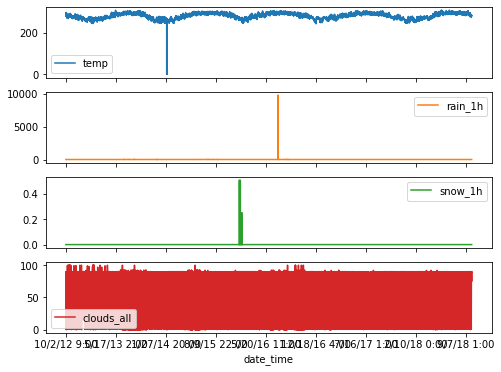

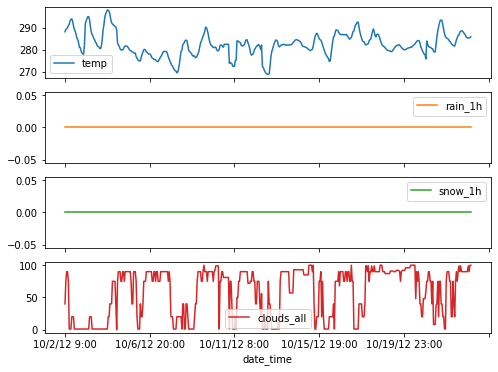

In [ ]:
plot_cols = ['temp', 'rain_1h', 'snow_1h','clouds_all']
plot_features = i_m[plot_cols]
plot_features.index = i_m['date_time']
_ = plot_features.plot(subplots=True)

plot_features = i_m[plot_cols][:480]
plot_features.index = i_m['date_time'][:480]
_ = plot_features.plot(subplots=True)

# from TenserFlow Tutorial

In [ ]:
i_m.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,40575.0,281.316763,13.816618,0.0,271.84,282.86,292.28,310.07
rain_1h,40575.0,0.318632,48.812640,0.0,0.00,0.00,0.00,9831.30
snow_1h,40575.0,0.000117,0.005676,0.0,0.00,0.00,0.00,0.51
clouds_all,40575.0,44.199162,38.683447,0.0,1.00,40.00,90.00,100.00
traffic_volume,40575.0,3290.650474,1984.772909,0.0,1248.50,3427.00,4952.00,7280.00


In [ ]:
i_m['date_time'] = pd.to_datetime(i_m['date_time'])
timestamp_s = i_m['date_time'].map(pd.Timestamp.timestamp)
# date_time converted to timestamp in seconds - SR

In [ ]:
timestamp_s

0        1.349168e+09
1        1.349172e+09
2        1.349176e+09
3        1.349179e+09
4        1.349183e+09
             ...     
40570    1.538334e+09
40571    1.538338e+09
40572    1.538341e+09
40573    1.538345e+09
40574    1.538348e+09
Name: date_time, Length: 40575, dtype: float64

In [ ]:
i_m['timestamp_s'] = timestamp_s

In [ ]:
i_m['holiday'].value_counts()

None                         40522
Columbus Day                     5
Veterans Day                     5
Thanksgiving Day                 5
Christmas Day                    5
New Years Day                    5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Labor Day                        5
Martin Luther King Jr Day        3
Name: holiday, dtype: int64

In [ ]:
i_m['weather_main'].value_counts()

Clouds          15123
Clear           13366
Rain             4769
Mist             3069
Snow             2297
Haze              766
Drizzle           515
Thunderstorm      453
Fog               201
Smoke              15
Squall              1
Name: weather_main, dtype: int64

In [ ]:
i_m['weather_description'].value_counts()

sky is clear                           11642
overcast clouds                         5072
broken clouds                           4650
scattered clouds                        3451
mist                                    3069
light rain                              2831
few clouds                              1950
Sky is Clear                            1724
light snow                              1588
moderate rain                           1379
haze                                     766
heavy snow                               500
heavy intensity rain                     408
light intensity drizzle                  360
proximity thunderstorm                   339
fog                                      201
snow                                     192
drizzle                                  138
proximity shower rain                    120
thunderstorm                              59
thunderstorm with light rain              23
very heavy rain                           18
heavy inte

## CREATING DUMMY VARIABLES ##

In [ ]:
i_m.drop('weather_description', inplace=True, axis=1)

In [ ]:
i_m.drop('weather_main', inplace=True, axis=1)

In [ ]:
i_m.drop('holiday', inplace=True, axis=1)

In [ ]:
#df1 = pd.get_dummies(i_m, columns = ['holiday'], drop_first=True)

In [ ]:
i_m.drop(columns=['date_time'],inplace=True)

In [ ]:
i_m.dtypes

temp              float64
rain_1h           float64
snow_1h           float64
clouds_all          int64
traffic_volume      int64
dtype: object

In [ ]:
col_list = list(i_m.columns)
col_list.remove('traffic_volume')

In [ ]:
i_m.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
0,288.28,0.0,0.0,40,5545
1,289.36,0.0,0.0,75,4516
2,289.58,0.0,0.0,90,4767
3,290.13,0.0,0.0,90,5026
4,291.14,0.0,0.0,75,4918


In [ ]:
i_m.to_excel('/content/Metro_Interstate_processed.xlsx')

## TRAIN AND TESTING SPLIT (AND VALIDATION) ##

In [ ]:
n = len(i_m)
tr_df = i_m[0:int(n*0.7)]
v_df = i_m[int(n*0.7):int(n*0.9)]
ts_df = i_m[int(n*0.9):]
# training and tesint split - SR

In [ ]:
x_train = -tr_df['traffic_volume']

In [ ]:
tr_df

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
0,288.28,0.0,0.0,40,5545
1,289.36,0.0,0.0,75,4516
2,289.58,0.0,0.0,90,4767
3,290.13,0.0,0.0,90,5026
4,291.14,0.0,0.0,75,4918
...,...,...,...,...,...
28397,288.30,0.0,0.0,1,641
28398,286.36,0.0,0.0,1,399
28399,285.52,0.0,0.0,1,255
28400,284.51,0.0,0.0,1,347


In [ ]:
x_train

0       -1.146297
1       -0.629045
2       -0.755216
3       -0.885409
4       -0.831120
           ...   
28397    1.318819
28398    1.440466
28399    1.512851
28400    1.466605
28401    1.185107
Name: traffic_volume, Length: 28402, dtype: float64

In [ ]:
tr_df

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
0,288.28,0.0,0.0,40,5545
1,289.36,0.0,0.0,75,4516
2,289.58,0.0,0.0,90,4767
3,290.13,0.0,0.0,90,5026
4,291.14,0.0,0.0,75,4918
...,...,...,...,...,...
28397,288.30,0.0,0.0,1,641
28398,286.36,0.0,0.0,1,399
28399,285.52,0.0,0.0,1,255
28400,284.51,0.0,0.0,1,347


In [ ]:
'''from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(i_m[col_list], i_m['traffic_volume'], test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30)'''

In [ ]:
'''train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)'''

In [ ]:
column_indices = {name: i for i, name in enumerate(i_m.columns)}

### NORMALIZE DATA ###

In [ ]:
train_mean = tr_df.mean()
train_std = tr_df.std()
# standard deviation and mean calculations - SR

In [ ]:
tr_df = (tr_df - train_mean)/train_std
v_df = (v_df - train_mean)/train_std
ts_df = (ts_df - train_mean)/train_std
# normalized data - SR

In [ ]:
tr_df

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
0,0.582478,-0.007543,-0.024705,-0.142745,1.146297
1,0.659777,-0.007543,-0.024705,0.761143,0.629045
2,0.675524,-0.007543,-0.024705,1.148524,0.755216
3,0.714889,-0.007543,-0.024705,1.148524,0.885409
4,0.787179,-0.007543,-0.024705,0.761143,0.831120
...,...,...,...,...,...
28397,0.583909,-0.007543,-0.024705,-1.149935,-1.318819
28398,0.445056,-0.007543,-0.024705,-1.149935,-1.440466
28399,0.384934,-0.007543,-0.024705,-1.149935,-1.512851
28400,0.312644,-0.007543,-0.024705,-1.149935,-1.466605


In [ ]:
train_mean.head()

temp               280.141873
rain_1h              0.440101
snow_1h              0.000168
clouds_all          45.527322
traffic_volume    3264.604218
dtype: float64

## WINDOW GENERATOR CLASS FROM TENSERFLOW TUTORIAL ##

In [ ]:
# FROM TENSERFLOW TUTORIAL - NOT WRITTEN BY MYSELF

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=tr_df, val_df=v_df, test_df=ts_df,
               label_columns=None):
    # raw data storage - SR
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # label column indices - SR
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # window parameters - SR
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
# example from tensorflow tutorial
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['traffic_volume'])
w1
# window generator instance - SR

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['traffic_volume']

In [ ]:
## TAKEN FROM TENSERFLOW TUTORIAL
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# 3 slices stacked - SR
example_window = tf.stack([np.array(tr_df[:w1.total_window_size]),
                           np.array(tr_df[100:100+w1.total_window_size]),
                           np.array(tr_df[200:200+w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 48, 5)
Inputs shape: (3, 24, 5)
Labels shape: (3, 1, 1)


In [ ]:
# taken from tenserflow tutorial and edited to current dataset
def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [ ]:
#taken from tenserflow tutorial and edited to current dataset

#added properties to window generato class
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:

    result = next(iter(self.train))

    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

## CREATE TF DATASET ##

In [ ]:
## TAKEN FROM TENSERFLOW TUTORIAL
# function to create dataset using keras timeseries
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=50,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
# adapted from TF tutorial
single_step_window = WindowGenerator(
    input_width=2, label_width=2, shift=1,
    label_columns=['traffic_volume'])
single_step_window

Total window size: 3
Input indices: [0 1]
Label indices: [1 2]
Label column name(s): ['traffic_volume']

In [ ]:
#taken from TENSERFLOW tutorial
# creating baseline class and adapting to current data - SR
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

## BASELINE MODEL ##

In [ ]:
wide_w = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['traffic_volume'])
wide_w
# tf tutorial
# window generator instance - SR

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['traffic_volume']

In [ ]:
column_indices = {name: i for i, name in enumerate(i_m.columns)}
# column indices definition - SR

In [ ]:
## TAKEN FROM TENSERFLOW TUTORIAL ##
# creating the baseline model and providing validation performance of the model as part of the outcome - SR
baseline = Baseline(label_index=column_indices['traffic_volume'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_w.val)
performance['Baseline'] = baseline.evaluate(wide_w.test, verbose=0)

162/162 [==============================] - 2s 5ms/step - loss: 0.1713 - mean_absolute_error: 0.2974


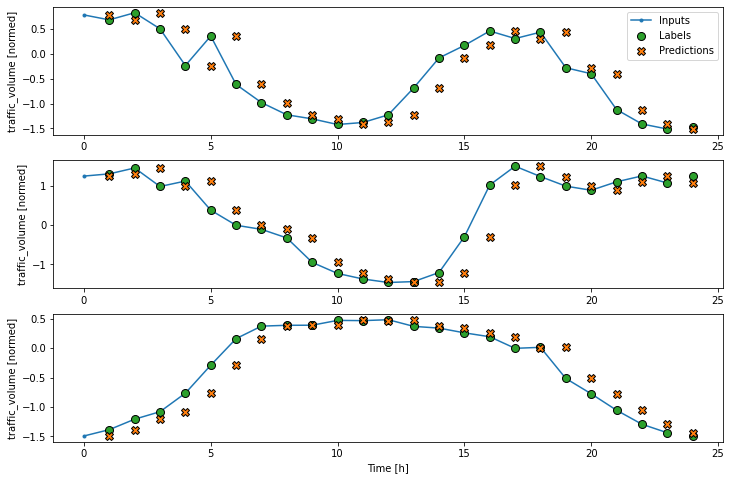

In [ ]:
wide_w.plot(baseline)
# plotting basline model to see predictions against inputs - SR

In [ ]:
baseline_pred = baseline.predict(wide_w.val)

In [ ]:
df = pd.DataFrame(baseline_pred)

In [ ]:
df.to_excel('/content/baseline_prediction.xlsx')

(9,)

## LINEAR MODEL ##

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5)
])

In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history
  #taken from tf tutorial

In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
568/568 [==============================] - 5s 8ms/step - loss: 1.5299 - mean_absolute_error: 0.8465 - val_loss: 0.6171 - val_mean_absolute_error: 0.6267
Epoch 2/20
568/568 [==============================] - 4s 7ms/step - loss: 0.8000 - mean_absolute_error: 0.5269 - val_loss: 0.2788 - val_mean_absolute_error: 0.4148
Epoch 3/20
568/568 [==============================] - 5s 8ms/step - loss: 0.5649 - mean_absolute_error: 0.4024 - val_loss: 0.1925 - val_mean_absolute_error: 0.3414
Epoch 4/20
568/568 [==============================] - 4s 7ms/step - loss: 0.4698 - mean_absolute_error: 0.3578 - val_loss: 0.1699 - val_mean_absolute_error: 0.3156
Epoch 5/20
568/568 [==============================] - 5s 8ms/step - loss: 0.4177 - mean_absolute_error: 0.3415 - val_loss: 0.1649 - val_mean_absolute_error: 0.3072
Epoch 6/20
568/568 [==============================] - 5s 8ms/step - loss: 0.3815 - mean_absolute_error: 0.3363 - val_loss: 0.1641 - val_mean_absolute_error: 0.3058
Epoch 7/20
568/5

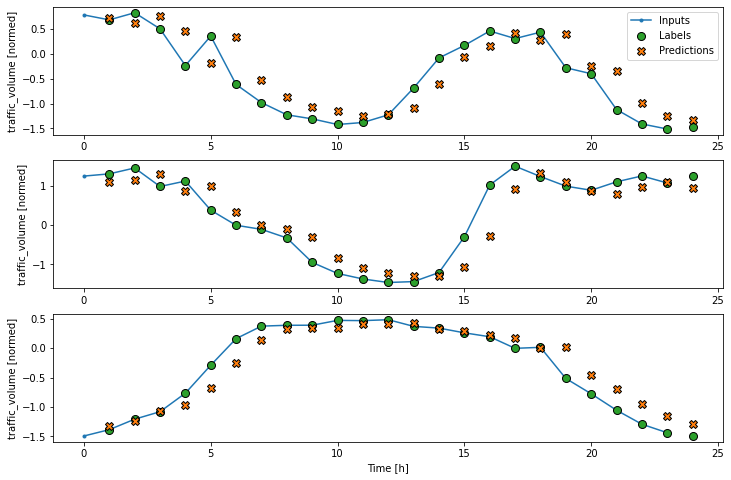

In [ ]:
wide_w.plot(linear)

In [ ]:
predict1 = linear.predict(wide_w.val)

In [ ]:
pred1 = ((predict1*1) + -1.008512e-17)

In [ ]:
pred1.shape

(8091, 24, 1)